# Homework 3

## Message from your Prof
> **Remember for the best way to learn this content, and maximize your learning experience, you must implement these models yourself and only use imports for checking your work**

You can only import classification_report from sklearn evaluation metrics (you do not need to implement classification report), but you have to implement the train_test_split, and the classifiers yourselves. You will need to use numpy or pandas as inputs for your models. You should only use the imports listed below to check your work.

Students that do not practice their own implementations **will be cooked** in their skill assessments. I do not want to hear students complaining they did poorly because the homeworks did not reflect the skill assessments. YOU HAVE BEEN WARNED!!!

<br>
In this assignment, we are working on a list of 1200 bitstrings, where each of them contains 16 bits. <br >
We will apply Agglomerative Clustering, K-means Clustering, and PCA to this dataset. <br >

## Background and Data Information
For a bitstring $S$ in this dataset, we describe $S = \{s_{15}, s_{14}, s_{13}, s_{12}, \ldots, s_{0} \}$, where $s_{15}$ is often known as the most significant bit (MSB) and $s_0$ as the least significant bit (LSB). <br >

There are duplicated bitstrings in this dataset, but they will not affect this assignment. Don't worry about them. <br >

## Equivalence Relation

**This is an important concept to Exercise 1.**

Let's say if we have two bitstrings, $A = \{a_{15}, a_{14}, a_{13}, \ldots, a_{0} \}$ and $B = \{b_{15}, b_{14}, b_{13}, \ldots, b_{0} \}$. <br >

We can flip one bit $a_i$ in $A$ to get another bitstring $A'$, such that the difference of $A$ and $A'$ is only one bit. We define the above transformation to be $A \to A'$. <br >


We call two bitstrings $A$ and $B$ to be **equivalent** ($A \sim B$) if there exists a sequence $A \to C_1 \to C_2 \to \cdots \to C_n \to B$, where $\forall i, C_i$ belongs to the dataset.

It can be seen that equivalence is both __commutative__ ($A \sim B \iff B \sim A$) as well as __transitive__ ($A \sim B, B \sim C \implies A \sim C$). <br >

We can say that the elements in the above sequence $\{ A, C_1, \ldots, C_n, B\}$ form an equivalence class. Given a new bitstring $X$, we can see that if $X \sim C_i$, $1 \le i \le n$, then $X$ will be added to the above equivalence class, and by the transitive property of equivalence relations, $X \sim A$, and $X \sim B$.

### Example

Let's say we have 4 bitstrings, each of them is 4 bits long. They are $0000, 0010, 0110, 1100$, respectively.<br >

We can say $0000 \sim 0110$ because $0000 \to 0010 \to 0110$. <br >

However, $0000 \nsim 1100$. There may be sequences like $0000 \to 1000 \to 1100$ or $0000 \to 0100 \to 1100$, but neither $1000$ nor $0100$ is in our dataset. <br >

Ultimately, $\{0000, 0010, 0110\}$ form an equivalence class, whereas $\{1100\}$ is the other. As a result, there are two classes.

### Libraries that can be used: numpy, scipy, pandas, scikit-learn, matplotlib, seaborn
Any libraries used in the discussion and lecture materials are also allowed.

In [ ]:
!git clone https://github.com/ucsd-cse151a-ss25/hw3.git

# Exercises
## Exercise 1 - Agglomerative Clustering (20 points in total)

Using agglomerative clustering with a distance threshold for early stopping, we can calculate the number of equivalence classes by counting the number of clusters. In order to perform agglomerative clustering, we have to consider what parameters may be used: <br >

### Exercise 1.1 - Choosing Parameters (5 points)

 - Explain why you would pick these parameters.
     - Which linkage rule should be used? (single-linkage, complete-linkage, or average-linkage)
     - Which distance function should be used? (Euclidean distance, Manhattan distance, or cosine distance)
     - What should the threshold distance be?

Hints:
 - How the distance threshold works: Whenever two clusters are picked to consider merging them, the distance between those clusters is compared to the distance threshold. If the distance is smaller than the threshold, the clusters merge and the algorithm continues; Otherwise, they will not be merged.
 - How to choose a linkage rule: Think about how you would figure out which equivalence class the string $0001$ belongs to in the previously given example.

In [17]:
import pandas as pd
import numpy as np
df = pd.read_csv('./bitstrings.csv') # change filename location based on your setup
import matplotlib.pyplot as plt
import seaborn as sns


### Exercise 1.2 - Agglomerative Clustering for Equivalence Classes (15 points)

 - Perform the agglomerative clustering with the parameters you picked in the above three questions.
 - Show the frequency(number of members) of each cluster. You are encouraged to create a bar chart to show the distribution as it will help you in Exercise 2, but printing only the numbers is also fine.

Hints:
 - The value of ```distance_threshold``` in the arguments should be **slightly** higher than what you picked. This is because we only merge two clusters when their distance is **strictly smaller** than the threshold.

In [ ]:
def hamming(a, b):
    return sum(x != y for x, y in zip(a, b))

bitstrings = df.astype(str).agg("".join, axis=1).tolist()

n = len(bitstrings)
adj = [[] for _ in range(n)]
for i in range(n):
    for j in range(i+1, n):
        if hamming(bitstrings[i], bitstrings[j]) == 1:
            adj[i].append(j)
            adj[j].append(i)

visited = [False]*n
labels = [-1]*n
cid = 0
for i in range(n):
    if not visited[i]:
        stack = [i]
        visited[i] = True
        labels[i] = cid
        while stack:
            u = stack.pop()
            for v in adj[u]:
                if not visited[v]:
                    visited[v] = True
                    labels[v] = cid
                    stack.append(v)
        cid += 1

from collections import Counter
counts = Counter(labels)
print("Number of equivalence classes:", len(counts))
print("Cluster sizes (descending):", sorted(counts.values(), reverse=True))

Number of equivalence classes: 38
Cluster sizes (descending): [296, 194, 193, 187, 100, 100, 99, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


## Exercise 2 - K-Means Clustering (20 points in total)

Let's see how k-means behave differently from agglomerative clustering.

### Exercise 2.1 - K-Means Clustering for Equivalence Classes (10 points)
 - Re-cluster the dataset with k-means, but with the number of clusters you obtained from Exercise 1.
 - Show the frequency(number of members) of each cluster. Again, you are encouraged to create a bar chart, but printing the numbers is also fine.

In [19]:
X = df.values.astype(int) 
n = X.shape
d = X.shape

def kmeans(X, k, max_iter=100):
    n, d = X.shape
    rng = np.random.default_rng(42)
    centroids = X[rng.choice(n, k, replace=False)]
    
    for _ in range(max_iter):
        dists = np.linalg.norm(X[:,None,:] - centroids[None,:,:], axis=2)  # (n,k)
        labels = dists.argmin(axis=1)
        
        new_centroids = np.array([X[labels==i].mean(axis=0) if np.any(labels==i) else centroids[i]
                                  for i in range(k)])
        
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
    
    return labels, centroids

k = len(counts)
labels, centroids = kmeans(X, k)

km_counts = Counter(labels)
print("K-means cluster sizes (descending):", sorted(km_counts.values(), reverse=True))


K-means cluster sizes (descending): [88, 83, 82, 81, 78, 71, 67, 67, 65, 49, 41, 40, 30, 27, 23, 21, 20, 19, 19, 19, 19, 18, 16, 14, 14, 13, 12, 12, 12, 11, 11, 10, 10, 9, 8, 8, 7, 6]


### Exercise 2.2 - Difference between Agglomerative Clustering and K-Means Clustering (10 points)

Compare the result from Exercise 2.1 with that from Exercise 1.2, and explain
 - How the two results are different
 - Why there is such a difference

With agglomerative clustering, the groups matched the “equivalence classes.” If two bitstrings could be connected by flipping one bit at a time they ended up in the same cluster. With K-Means, the groups looked different. Some clusters were much bigger or smaller than before, and sometimes one equivalence class got split across multiple clusters.

Agglomerative clustering works by linking points if they are only one bit apart. K-means uses Euclidean distance so it mixes up the real equivalence class.

## Exercise 3 - Principal Component Analysis (30 points in total)

We can visualize how the bitstrings are distributed using principal component analysis.

### Exercise 3.1 - Generate 2 Clusters (10 points)

 - Re-do the k-means clustering on our dataset again, but this time we only consider ```k=2```.
 - Show the frequency(number of members) of each cluster.

In [20]:
X = df.values.astype(int)   # shape (n,16)
n = X.shape
d = X.shape

def kmeans(X, k, max_iter=100):
    n, d = X.shape
    rng = np.random.default_rng(0)
    centroids = X[rng.choice(n, k, replace=False)]
    for _ in range(max_iter):
        dists = np.linalg.norm(X[:,None,:] - centroids[None,:,:], axis=2)
        labels = dists.argmin(axis=1)
        new_centroids = np.array([X[labels==i].mean(axis=0) for i in range(k)])
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
    return labels

labels = kmeans(X, 2)
counts = Counter(labels)
print("Cluster sizes with k=2:", counts)

Cluster sizes with k=2: Counter({np.int64(0): 784, np.int64(1): 416})


### Exercise 3.2 - PCA for Feature Extraction (20 points)

 - Retrieve the projected dataset with PCA, using ```n_components=2```.
 - Generate a scatter plot to visualize the projected points, where they should be colored differently based on the assigned cluster in Exercise 3.1.
 - In the first principal component, **print out** the weights of all features.
 - Report which feature has the **highest positive** weight in the first principal component.

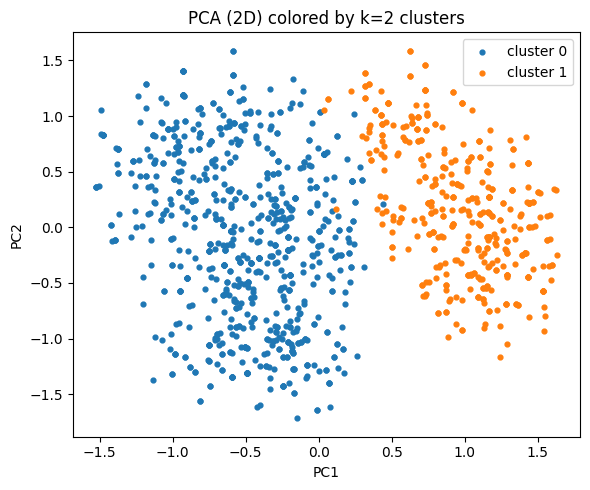

PC1 weights (feature: weight):
b15: 0.321441
b14: -0.306035
b13: -0.102196
b12: 0.027018
b11: -0.000505
b10: -0.251002
b9: -0.412798
b8: -0.413675
b7: 0.345302
b6: 0.253055
b5: -0.116788
b4: -0.047111
b3: -0.193444
b2: -0.012798
b1: -0.006564
b0: 0.388015

Feature with highest positive weight in PC1: b0


In [ ]:
X = df.values.astype(float)

U, S, Vt = np.linalg.svd(X - X.mean(axis=0), full_matrices=False)
components = Vt            # rows are PCs, shape (16,16)

Z = (X - X.mean(axis=0)) @ components[:2].T   # (n,2)

plt.figure(figsize=(6,5))
for c in np.unique(labels):
    mask = (labels == c)
    plt.scatter(Z[mask, 0], Z[mask, 1], s=12, label=f"cluster {c}")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA (2D) colored by k=2 clusters")
plt.legend()
plt.tight_layout()
plt.show()

pc1_weights = components[0]           # length 16
feature_names = list(df.columns)      # e.g., ['b15','b14',...,'b0']

print("PC1 weights (feature: weight):")
for name, w in zip(feature_names, pc1_weights):
    print(f"{name}: {w:.6f}")

idx_max = int(np.argmax(pc1_weights))
print("\nFeature with highest positive weight in PC1:", feature_names[idx_max])

## Exercise 4 - Singular Value Decomposition (25 points in total)

Let's decompose our data set into left and right matrices to find unknown structure in our data

### Exercise 4.1 - Generate the [SVD](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html) (10 points)

 - Generate multiple SVD's using 2, 3 and 4 components ```k=2, k=3 and k=4```.
 Give each SVD it's own python variable.
 - Calculate a pairwise cosine similarity of our kxn matrix for n features (should result in an nxn matrix)
 - Generate Pair plots for the left and right matrices.
 - Evaluate your results and what can you extract from the results of k=2, k=3 and k=4 dimensional reductions?

**Before performing SVD, let's first calculate our Eigen values and Eigen vectors of our matrix**

In [22]:
eigen_values, eigen_vectors = np.linalg.eig(np.array(df).T @ np.array(df))

In [23]:
# Let's evaluate our values. You can use this for your final evaluation for 4.1
eigen_values

array([5560.91998098,  774.88748042,  586.3344905 ,  473.08470787,
        333.56242611,  302.35801968,  267.84917439,  250.33232478,
        210.71729272,  173.17591399,  143.04620217,  104.01125393,
        128.95448083,  119.45970652,  113.53343526,  115.77310985])

In [24]:
from sklearn.decomposition import TruncatedSVD
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
# Here we generate an SVD using k = 5 yielding u,s,v of mx5, 5x5, nx5.T
X = df.values
U, s, Vt = np.linalg.svd(X, full_matrices=False)

In [26]:
k = 5
U_k = U[:, :k]                # m × 5
s_k = s[:k]                   # length-5 vector
Vt_k = Vt[:k, :]              # 5 × n

In [27]:
explained_variance = (s_k**2) / (X.shape[0] - 1)
total_var = (s**2).sum() / (X.shape[0] - 1)
explained_variance_ratio = explained_variance / total_var

print("Explained variance ratio:", explained_variance_ratio) # Prints the explained variance for each of the 5 components
print("Sum of top-5 ratios:", explained_variance_ratio.sum()) # Prints the sum of the 5 from above
sigma_matrix = np.diag(s_k)  # Creates the sigma matrix from the singular values
print("Sigma matrix:\n", sigma_matrix) # Prints the sigma matrix
print("Singular values:", s_k) # Our singular values

Explained variance ratio: [0.5757838  0.08023271 0.06070972 0.04898371 0.03453742]
Sum of top-5 ratios: 0.8002473685946399
Sigma matrix:
 [[74.57157623  0.          0.          0.          0.        ]
 [ 0.         27.83680083  0.          0.          0.        ]
 [ 0.          0.         24.21434473  0.          0.        ]
 [ 0.          0.          0.         21.75051052  0.        ]
 [ 0.          0.          0.          0.         18.26369147]]
Singular values: [74.57157623 27.83680083 24.21434473 21.75051052 18.26369147]


In [28]:
# We will define our cosine similarity function
def cosine_similarity(a, b):
    """Calculates the cosine similarity between two vectors."""
    dot_product = np.dot(a, b)
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b)
    return dot_product / (norm_a * norm_b)

In [29]:
right_matrix = pd.DataFrame(Vt_k)
print("Right matrix shape:", right_matrix.shape) # lets check the shape

Right matrix shape: (5, 16)


In [30]:
right_matrix

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.224738,-0.231620,-0.128592,-0.310244,-0.147987,-0.243458,-0.281356,-0.282752,-0.175377,-0.322661,-0.192425,-0.195697,-0.341603,-0.281952,-0.255848,-0.266339
1,-0.340002,0.292540,0.066576,-0.091186,-0.035265,0.212901,0.375147,0.377218,-0.383869,-0.302709,0.091712,0.054918,0.142340,-0.043132,-0.068585,-0.423359
2,0.325881,0.307351,-0.027253,-0.377403,-0.162040,-0.059054,0.046899,0.179557,-0.065260,0.029107,-0.403549,0.552484,-0.181907,-0.097216,-0.175877,0.212853
3,0.216463,0.353458,-0.219492,0.210434,0.439688,0.286455,-0.125396,-0.001257,0.099859,-0.260307,-0.257212,-0.294463,0.102176,-0.427541,-0.117092,0.084289
4,-0.101103,-0.239995,-0.116768,-0.261725,0.054778,0.509751,-0.162442,0.225142,0.018983,0.278692,0.422142,0.115965,-0.248836,-0.407471,-0.010053,0.111304


**Generate code for performing a pairwise calculation of our features using cosine_similarity**

Left matrix shape: (1200, 4)
Right matrix shape: (16, 4)
Feature–feature cosine similarity (first 5 rows):
          b15       b14       b13       b12       b11       b10        b9  \
b15  1.000000  0.382066 -0.335651  0.076384  0.314799  0.101847 -0.276508   
b14  0.382066  1.000000 -0.231798  0.011039  0.439157  0.772679  0.496523   
b13 -0.335651 -0.231798  1.000000 -0.014572 -0.578986 -0.136925  0.677942   
b12  0.076384  0.011039 -0.014572  1.000000  0.762727  0.589296  0.034170   
b11  0.314799  0.439157 -0.578986  0.762727  1.000000  0.763577 -0.142875   

           b8        b7        b6        b5        b4        b3        b2  \
b15 -0.022694  0.687253  0.442649 -0.591706  0.380820 -0.036613 -0.156333   
b14  0.763274 -0.214887 -0.314651 -0.457552  0.322491  0.396866 -0.409619   
b13  0.426328 -0.199620  0.571507  0.709809  0.450527  0.319958  0.939231   
b12 -0.054010  0.570583  0.223229  0.528790 -0.604559  0.798808  0.135057   
b11 -0.004456  0.434914 -0.239810 -0.087020 -

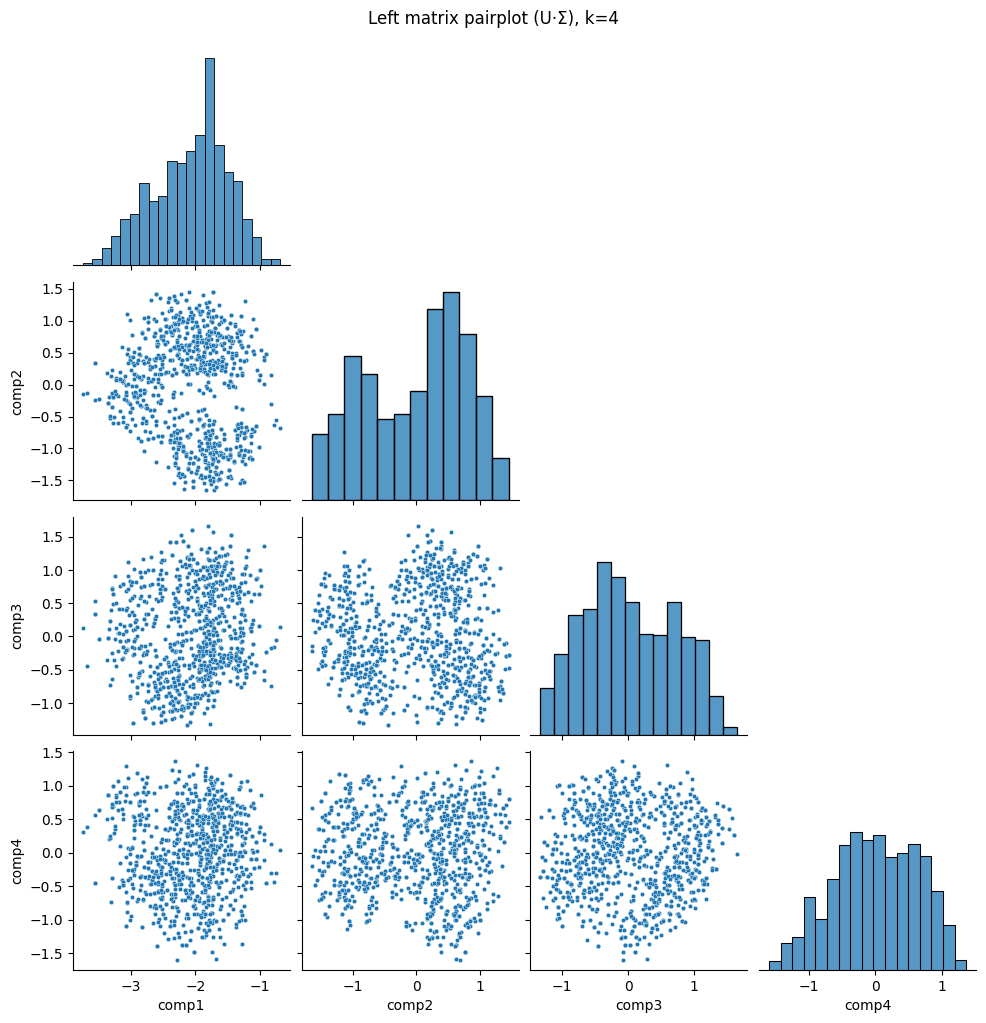

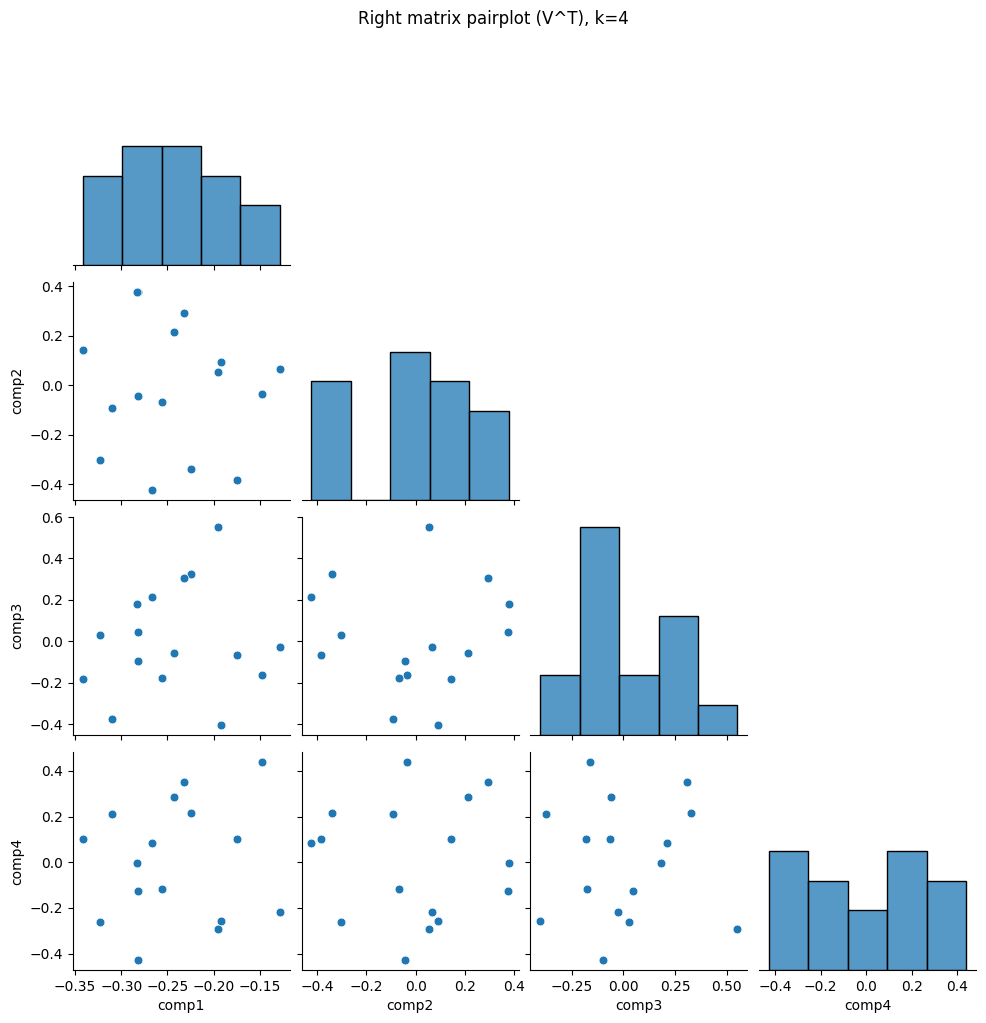

In [ ]:
X = df.values.astype(float)                 # (n_samples, n_features)
U, s, Vt = np.linalg.svd(X, full_matrices=False)

k = 4

U_k  = U[:, :k]                             # (n_samples, k)
s_k  = s[:k]                                # (k,)
Vt_k = Vt[:k, :]                            # (k, n_features)

# Left matrix (scores): U_k Σ_k  → scale columns by singular values
left_matrix  = pd.DataFrame(U_k * s_k.reshape(1, -1),
                            columns=[f"comp{i+1}" for i in range(k)])
# Right matrix (loadings): V^T_k, transpose so rows = features
right_matrix = pd.DataFrame(Vt_k.T, index=df.columns,
                            columns=[f"comp{i+1}" for i in range(k)])

print("Left matrix shape:", left_matrix.shape)
print("Right matrix shape:", right_matrix.shape)

R = right_matrix.values.T                  # shape (k, n_features)
norms = np.linalg.norm(R, axis=0, keepdims=True) + 1e-12
Rn = R / norms
cosine_nxn = Rn.T @ Rn                     # (n_features, n_features)
cos_df = pd.DataFrame(cosine_nxn, index=df.columns, columns=df.columns)
print("Feature–feature cosine similarity (first 5 rows):")
print(cos_df.head())

sns.pairplot(left_matrix, corner=True, plot_kws=dict(s=10))
plt.suptitle(f"Left matrix pairplot (U·Σ), k={k}", y=1.02)
plt.show()

sns.pairplot(right_matrix, corner=True, plot_kws=dict(s=40))
plt.suptitle(f"Right matrix pairplot (V^T), k={k}", y=1.02)
plt.show()

**Let's extract our left matrix** This is similar to looking at customers with similar movie viewing habits

In [37]:
left_matrix = pd.DataFrame((U_k * s_k) / s_k)
print("Left matrix shape:", left_matrix.shape) #let's check the shape

Left matrix shape: (1200, 4)


In [38]:
left_matrix

,0,1,2,3
0,-0.025458,0.024985,0.005178,-0.058114
1,-0.021131,0.035859,0.003976,-0.046146
2,-0.017358,0.022382,0.002039,-0.040381
3,-0.021131,0.035859,0.003976,-0.046146
4,-0.024396,0.043507,0.001537,-0.032976
...,...,...,...,...
1195,-0.040810,0.000530,-0.001909,0.051564
1196,-0.037239,0.015738,-0.010699,0.047688
1197,-0.045137,-0.010345,-0.000707,0.039596
1198,-0.050342,-0.005077,0.005444,0.014232


**Explain your interpretation for each of the SVD's you generated for k=2, 3, 4**

k = 2

With only 2 components, we keep the “strongest” patterns in the dataset. The left matrix (rows = bitstrings) shows that many points collapse into 2D groups. The right matrix (features) shows which bits (b15…b0) contribute most to the main directions. good for visualization, but oversimplifies the dataset.

k = 3

Adding a 3rd component captures more variance. The left matrix spread shows clearer separation between groups of bitstrings that looked mixed in 2D. The right matrix pair plots let us see which features load together on 2 or 3 axes. balances interpretability and accuracy better than k=2.

k = 4

At 4 components, we capture even more structure. The left matrix shows clusters are more spread out and differences between equivalence classes become clearer. In the right, features with smaller influence get included. less visually simple, but gives the most accurate representation out of the three.

### Exercise 4.2 - Generate Clusters (15 points)

 - Re-do the k-means clustering on our dataset again for the three different components created by you above, of the left matrix.
 - Show the frequency (number of members) of each cluster.
 - Generate clusters from 2 to 10
 - Use the [silhouette](https://scikit-learn.org/1.5/auto_examples/cluster/plot_kmeans_silhouette_analysis.html) method to choose the best k clusters


=== Left matrix with 2 components ===
k=2 cluster sizes: {np.int64(0): 772, np.int64(1): 428}
k=3 cluster sizes: {np.int64(2): 558, np.int64(1): 273, np.int64(0): 369}
k=4 cluster sizes: {np.int64(0): 545, np.int64(1): 260, np.int64(2): 231, np.int64(3): 164}
k=5 cluster sizes: {np.int64(2): 222, np.int64(3): 212, np.int64(1): 232, np.int64(4): 177, np.int64(0): 357}
k=6 cluster sizes: {np.int64(4): 206, np.int64(5): 130, np.int64(0): 151, np.int64(3): 149, np.int64(2): 202, np.int64(1): 362}
k=7 cluster sizes: {np.int64(1): 190, np.int64(0): 114, np.int64(4): 139, np.int64(3): 204, np.int64(2): 164, np.int64(6): 244, np.int64(5): 145}
k=8 cluster sizes: {np.int64(6): 140, np.int64(1): 109, np.int64(4): 146, np.int64(5): 108, np.int64(7): 157, np.int64(0): 171, np.int64(3): 240, np.int64(2): 129}
k=9 cluster sizes: {np.int64(7): 149, np.int64(6): 88, np.int64(3): 91, np.int64(5): 127, np.int64(1): 174, np.int64(0): 126, np.int64(8): 76, np.int64(2): 232, np.int64(4): 137}
k=10 cluster

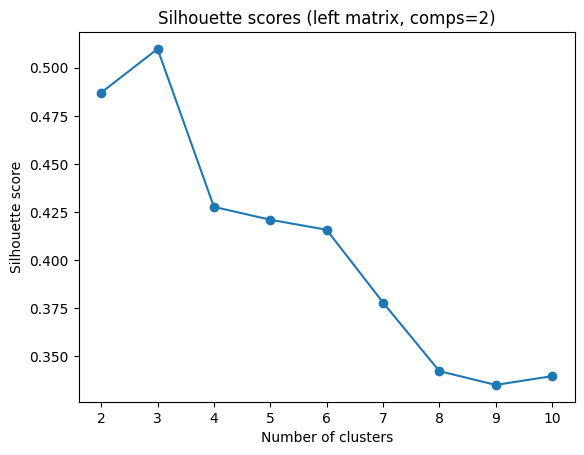


=== Left matrix with 3 components ===
k=2 cluster sizes: {np.int64(0): 769, np.int64(1): 431}
k=3 cluster sizes: {np.int64(1): 430, np.int64(2): 348, np.int64(0): 422}
k=4 cluster sizes: {np.int64(0): 354, np.int64(2): 260, np.int64(3): 190, np.int64(1): 396}
k=5 cluster sizes: {np.int64(2): 217, np.int64(3): 196, np.int64(1): 187, np.int64(4): 215, np.int64(0): 385}
k=6 cluster sizes: {np.int64(0): 200, np.int64(3): 191, np.int64(1): 180, np.int64(5): 223, np.int64(4): 264, np.int64(2): 142}
k=7 cluster sizes: {np.int64(1): 171, np.int64(4): 117, np.int64(3): 118, np.int64(5): 179, np.int64(0): 215, np.int64(6): 240, np.int64(2): 160}
k=8 cluster sizes: {np.int64(6): 109, np.int64(2): 116, np.int64(4): 175, np.int64(7): 176, np.int64(1): 85, np.int64(0): 136, np.int64(3): 263, np.int64(5): 140}
k=9 cluster sizes: {np.int64(7): 100, np.int64(8): 112, np.int64(3): 122, np.int64(5): 103, np.int64(1): 164, np.int64(6): 114, np.int64(0): 96, np.int64(4): 233, np.int64(2): 156}
k=10 cluste

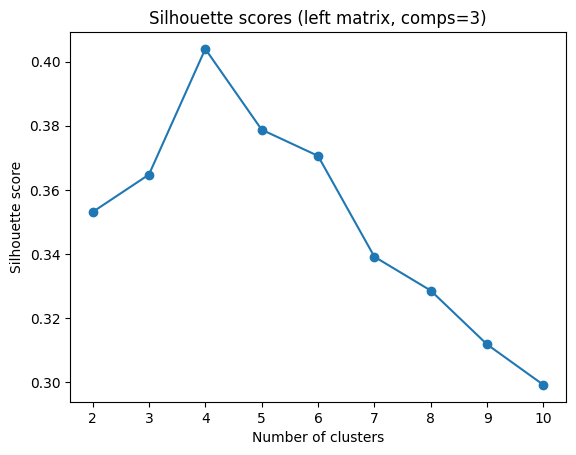


=== Left matrix with 4 components ===
k=2 cluster sizes: {np.int64(0): 769, np.int64(1): 431}
k=3 cluster sizes: {np.int64(2): 417, np.int64(1): 366, np.int64(0): 417}
k=4 cluster sizes: {np.int64(1): 255, np.int64(0): 253, np.int64(2): 282, np.int64(3): 410}
k=5 cluster sizes: {np.int64(1): 220, np.int64(2): 195, np.int64(3): 179, np.int64(4): 215, np.int64(0): 391}
k=6 cluster sizes: {np.int64(4): 141, np.int64(0): 201, np.int64(3): 170, np.int64(1): 320, np.int64(2): 155, np.int64(5): 213}
k=7 cluster sizes: {np.int64(1): 134, np.int64(4): 164, np.int64(3): 127, np.int64(2): 172, np.int64(6): 280, np.int64(0): 114, np.int64(5): 209}
k=8 cluster sizes: {np.int64(1): 103, np.int64(2): 97, np.int64(4): 107, np.int64(6): 111, np.int64(7): 173, np.int64(3): 286, np.int64(5): 113, np.int64(0): 210}
k=9 cluster sizes: {np.int64(6): 103, np.int64(8): 97, np.int64(3): 107, np.int64(7): 111, np.int64(1): 171, np.int64(4): 181, np.int64(2): 114, np.int64(5): 106, np.int64(0): 210}
k=10 cluste

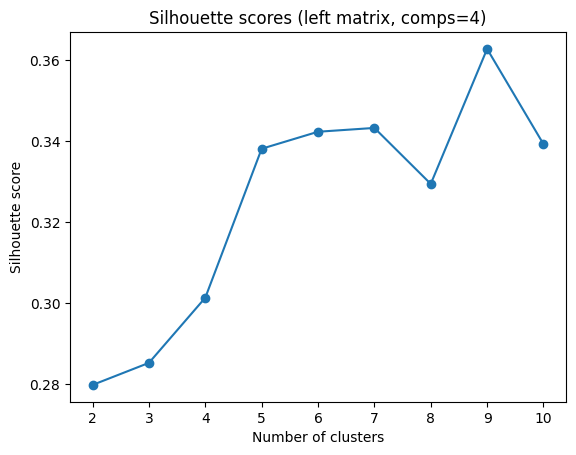

In [ ]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

U, s, Vt = np.linalg.svd(df.values.astype(float), full_matrices=False)

def left_matrix_for_k(U, s, k):
    U_k = U[:, :k]
    s_k = s[:k]
    return U_k * s_k.reshape(1, -1)

def kmeans(X, k, max_iter=100):
    n, d = X.shape
    rng = np.random.default_rng(0)
    centroids = X[rng.choice(n, k, replace=False)]
    for _ in range(max_iter):
        dists = np.linalg.norm(X[:,None,:] - centroids[None,:,:], axis=2)
        labels = dists.argmin(axis=1)
        new_centroids = np.array([X[labels==i].mean(axis=0) for i in range(k)])
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
    return labels

def silhouette_score_manual(X, labels):
    n = len(X)
    scores = []
    for i in range(n):
        same_cluster = (labels == labels[i])
        other_clusters = ~same_cluster
        # a(i) = avg distance to same-cluster points
        if np.sum(same_cluster) > 1:
            a_i = np.mean(np.linalg.norm(X[same_cluster] - X[i], axis=1))
        else:
            a_i = 0
        # b(i) = min avg distance to another cluster
        b_i = np.inf
        for c in np.unique(labels):
            if c != labels[i]:
                members = (labels == c)
                if np.any(members):
                    dist = np.mean(np.linalg.norm(X[members] - X[i], axis=1))
                    b_i = min(b_i, dist)
        s_i = (b_i - a_i) / max(a_i, b_i) if max(a_i, b_i) > 0 else 0
        scores.append(s_i)
    return np.mean(scores)

for comps in [2, 3, 4]:
    print(f"\n=== Left matrix with {comps} components ===")
    left = left_matrix_for_k(U, s, comps)

    sil_scores = []
    for k in range(2, 11):
        labels = kmeans(left, k)
        counts = Counter(labels)
        print(f"k={k} cluster sizes:", dict(counts))
        sil = silhouette_score_manual(left, labels)
        sil_scores.append(sil)

    plt.plot(range(2, 11), sil_scores, marker="o")
    plt.title(f"Silhouette scores (left matrix, comps={comps})")
    plt.xlabel("Number of clusters")
    plt.ylabel("Silhouette score")
    plt.show()

## Exercise 4 - Collaborative Statement (5 points)
### You must fill this out even if you worked alone to get credit.

It is mandatory to include a Statement of Collaboration in each submission, that follows the guidelines below.
Include the names of everyone involved in the discussions (especially in-person ones), and what was discussed.
All students are required to follow the academic honesty guidelines posted on the course website. For
programming assignments in particular, I encourage students to organize (perhaps using Piazza) to discuss the
task descriptions, requirements, possible bugs in the support code, and the relevant technical content before they
start working on it. However, you should not discuss the specific solutions, and as a guiding principle, you are
not allowed to take anything written or drawn away from these discussions (no photographs of the blackboard,
written notes, referring to Piazza, etc.). Especially after you have started working on the assignment, try to restrict
the discussion to Piazza as much as possible, so that there is no doubt as to the extent of your collaboration.

I worked on this assignment alone.I used ChatGPT only to clarify Python syntax and the usage of specific libraries, but all of the problem solving, code design, and written explanations are my own work.